**Cannabis Irrigation Scheduling Using Soil Moisture Sensors** <br />
Indoor Grown Cannabis Dry-Back Crop Steering Assessment 


## Prepared by B. Keith Bellingham, <br />
Soil Scientist, <br />
October 13, 2022<br/>
https://www.linkedin.com/in/bkbellingham/


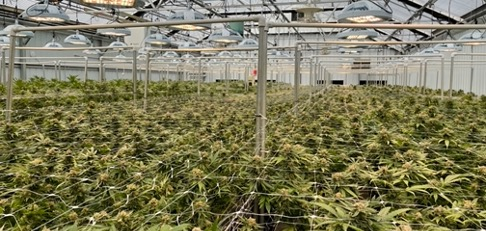

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.signal import argrelextrema
from IPython import display
from IPython.display import display, Math, Latex

**Introduction**<br />

Indoor grown cannabis has three stages within a 3-month growing season, a seeding stage, vegetive stage and a flowering stage. Water and fertigation content in the grow media directly impacts the heath of the crop and the concentration of the THC produced. Soil moisture was monitored every 5 minutes in 20 cannabis plants in a single irrigation zone. The irrigation zone consists of 630 cannabis plants in total and the moisture monitoring took place over two months during veg and flowering stages.  During these growth stages, soil moisture sensors insure adequate moisture from daily irrigation events. The cannabis plant will become stress and susceptible to disease if the moisture gets too low or stays too wet. Toward the end of the growing season before harvest, a dry-back procedure is carried out where the irrigation zone is not watered for 3 to 5 days. This intentionally stresses the cannabis causing the cannabis plant to produce more THC and CBD in the flower.  Soil moisture data can give the grower valuable insight during the dry-back and help ensure crop heath during the growth stages. 

**Theory**<br />
The relationship between soil moisture and crop health is not straightforward and usually not well understood.  Techniques and tools commonly used in the field of data science are used to understand the flow and retention of water in the soil.  

Water movement in soil is driven by two physical forces, gravity and capillarity. If the soil is completely saturated or very wet (After an irrigation event), the primary force acting on the water will be gravity and can be best disrobed be Darcy’s Law; 


$$\frac{\partial \theta}{\partial t} = flow  = -K_s(dh/dz)$$

Where $\theta$  is volumetric soil moisture, *K_s* is the saturated hydraulic conductivity, *h* is hydraulic head and *z* is depth.  

After gravity gets finish pulling the water out of the soil, the predominant force acting on the water is capillary forces which is the force of the surface tension between water and air. Water movement from capillary forces is commonly called “wicking” and is described by the Richard’s Equation;


$$\frac{\partial \theta}{\partial t} = flow  =   \frac{\partial (K_h   \frac{\partial h}{\partial z}         }{\partial z} )  + \frac{\partial K_h} {\partial z }   -S(h) $$    



In the Richard’s equation *K_h* is now the head dependent hydraulic conductivity, and *-S(h)* is basically evaporation. 

In plant/water dynamics, the optimal soil water content for most crops and most plants is call the available water capacity (AWC) and is largely a function of the soil. The upper limit of the AWC is the soil’s “field capacity”. The field capacity is an important hydrological threshold in agriculture and agronomy. Field capacity is defined as the soil moisture after the water drains out. It is where the gravitational force acting on the water in soil is equal to the capillary forces acting on the water and thus *K_h* from the Richard’s equation is equal to *K_s* in Darcy’s Law.  The lower limit of the AWC can be assumed to be 80% of the Field capacity. Basically, the optimal soil moisture for most crops is between field capacity and 80% of field capacity. 

Field capacity may be expensive and difficult to measure in the lab. Also, field capacity is highly variable because soil is highly variable. Factors such as compaction, organic matter, texture, particle size distribution, and the roots of the plant all affect the soil moisture values where field capacity would occur.  Because of this variability, each individual soil sensor experiences a local field capacity, and the mathematical and algorithmic determination of field capacity needs to be carried out for each sensor separately. 

Since the local soil field capacity is not likely to change during a grow season, a select time range of the soil moisture time series data can be chosen as training data. This would eliminate errors in the calculation of field capacity if the crop is under or over irrigated.    

The goal is to determine the AWC and determine when crops would become stressed form the time series soil moisture data. 


In [2]:
#Bring Data in
A1Top = pd.read_csv('Cannabis_Irrigation.csv')
A1Top.head()

,DateTime,SM_Top_A1
0,2022-02-21 00:00:00,41.3
1,2022-02-21 00:15:00,34.5
2,2022-02-21 00:30:00,32.6
3,2022-02-21 00:45:00,31.7
4,2022-02-21 01:00:00,31.6


**Methods**<br />


In an indoor cannabis grow operation, the soil, irrigation, and other factors are all highly controlled. Therefore, it is assumed the field capacity occurs 2.5 hours after an irrigation event. The average soil moisture  2.5 hours after an irrigation event is used  to determine field capacity, and then multiplied time 0.8 to get the lower limit.   
An irrigation event can be identified in a two-step process. A rolling standard deviation (rstd) can be using to exacerbate the event in a pandas dataframe. If the rstd is big, soil moisture is changing, if it is small, then it is not changing very much. And the extreme point function from the SciPy Python Library was used to help isolate the peaks in the rstd. 

Sometime, a subsequent irrigation event starts within the 2.5 hour after the previous irrigation event. This would be evident by a high rstd 2.5 hours after the irrigation event. In this case, this soil moisture is rejected from the field capacity calculation because would have a higher moisture as it is still draining. 




**Materials**<br />

The twenty soil moisture sensors were installed in twenty different containers holding one to two cannabis plants. Sensors were connected to a logger logging data every 5 minutes for two months of the growing season. The sensors measured volumetric water content and electrical conductivity parameters. Data and methods are only shown here from one sensor.  


In [3]:
#Use a rolling standard deviation to help determine irrigation events

A1Top['rstd'] = A1Top['SM_Top_A1'].rolling(window=3, center=True).std()
A1Top.head()

,DateTime,SM_Top_A1,rstd
0,2022-02-21 00:00:00,41.3,NaN
1,2022-02-21 00:15:00,34.5,4.574203
2,2022-02-21 00:30:00,32.6,1.429452
3,2022-02-21 00:45:00,31.7,0.550757
4,2022-02-21 01:00:00,31.6,0.321455


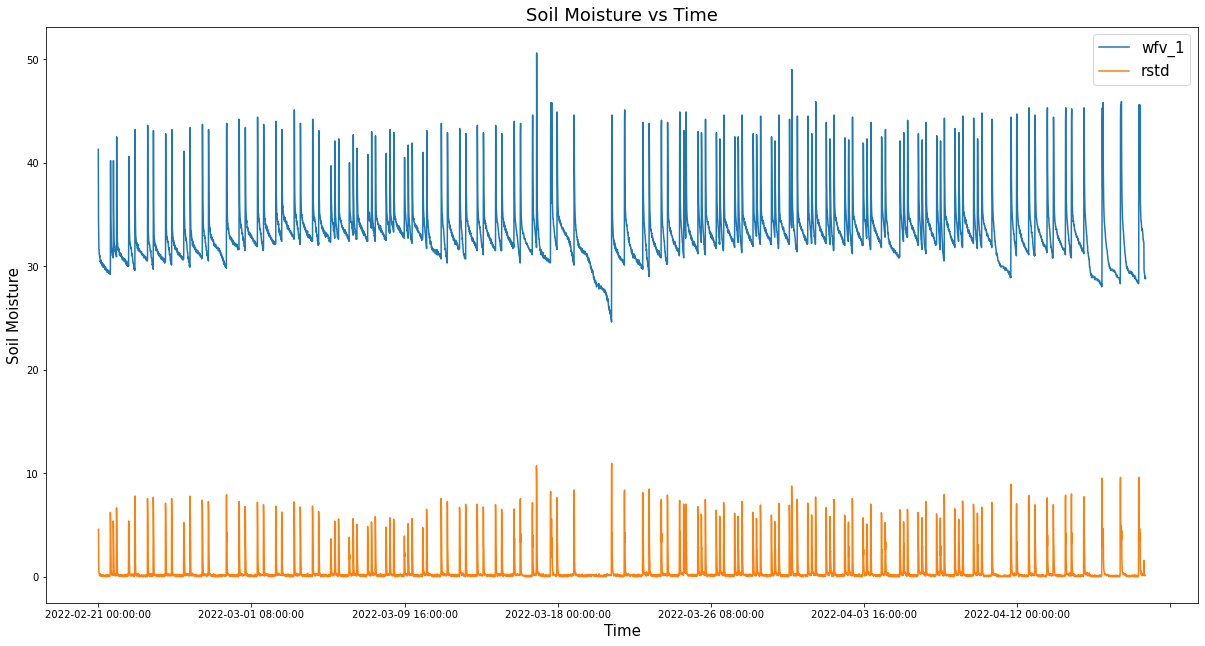

In [4]:
x = A1Top['DateTime']
y_1 = A1Top['SM_Top_A1']
y_2 = A1Top['rstd']

fig = plt.figure(figsize=(16,8))
axes_4 = fig.add_axes([0,0,1,1]) 
axes_4.set_xlabel('Time' ,fontsize=15,) #rotation='vertical')
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time',fontsize=18)
axes_4.plot(x, y_1, label='wfv_1')
axes_4.plot(x, y_2, label='rstd')

axes_4.legend(loc='best',fontsize=15)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))

plt.show()

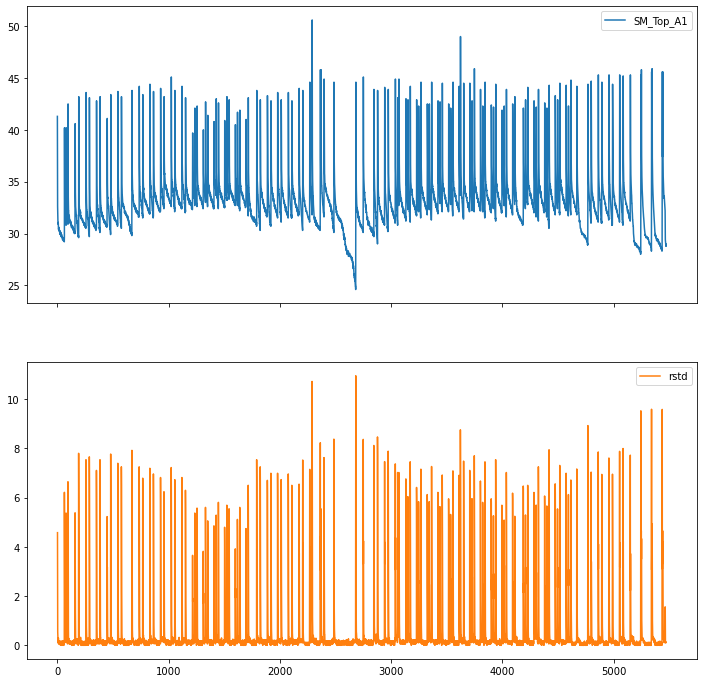

In [5]:
A1Top.plot(subplots=True, figsize=(12, 12)); plt.legend(loc='best')

/Users/bryantbellingham/opt/anaconda3/envs/PandaTUT_DB/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


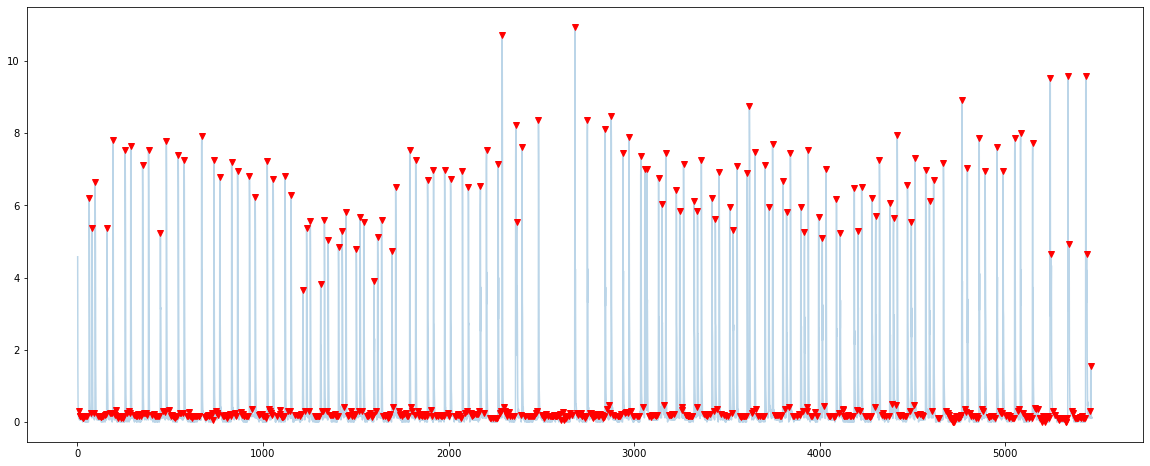

In [6]:
#Use Extreme peak method on the rolling std column. This finds the irrigation event with a boolean in the df
ilocs_max = argrelextrema(A1Top.rstd.values, np.greater_equal, order=3)[0]
A1Top.rstd.plot(figsize=(20,8), alpha=.3)
A1Top.iloc[ilocs_max].rstd.plot(style='.',lw=10, color='red', marker='v');


In [7]:
A1Top['rstd_max'] = False
A1Top.loc[A1Top.iloc[ilocs_max].index, 'rstd_max'] = True
#The field capacity is assumed to be reached 2.5 hours after the irrigation event. 
#The soil moisture and the rolling std columns are shifted down by 6. 
#The down shifted rstd is used to reject moisture values if irrigation starts 
#within 2.5 hours after the subsequent irrigation event.   

A1Top['SM_Shift'] = A1Top['SM_Top_A1'].shift(6)
A1Top['rstd_Shift'] = A1Top['rstd'].shift(6)
A1Top[20:30]

,DateTime,SM_Top_A1,rstd,rstd_max,SM_Shift,rstd_Shift
20,2022-02-21 05:00:00,30.3,0.173205,True,30.6,0.173205
21,2022-02-21 05:15:00,30.0,0.152753,False,30.3,0.173205
22,2022-02-21 05:30:00,30.1,0.100000,False,30.3,0.057735
23,2022-02-21 05:45:00,30.2,0.057735,False,30.4,0.100000
24,2022-02-21 06:00:00,30.2,0.173205,False,30.2,0.100000
25,2022-02-21 06:15:00,29.9,0.173205,True,30.3,0.057735
26,2022-02-21 06:30:00,30.2,0.152753,False,30.3,0.173205
27,2022-02-21 06:45:00,30.0,0.115470,False,30.0,0.152753
28,2022-02-21 07:00:00,30.0,0.000000,False,30.1,0.100000
29,2022-02-21 07:15:00,30.0,0.057735,False,30.2,0.057735


In [8]:
fc_df = A1Top.loc[(A1Top['rstd_max'] == True) & (A1Top['rstd']>4) & (A1Top['rstd_Shift']<1)]
fc_df.iloc[10:20]

,DateTime,SM_Top_A1,rstd,rstd_max,SM_Shift,rstd_Shift
479,2022-02-25 23:45:00,30.0,7.765522,True,30.5,0.057735
543,2022-02-26 15:45:00,30.9,7.390083,True,31.0,0.000000
575,2022-02-26 23:45:00,30.5,7.247298,True,31.1,0.057735
670,2022-02-27 23:30:00,43.2,7.915386,True,30.1,0.057735
735,2022-02-28 15:45:00,31.7,7.245918,True,31.6,0.000000
767,2022-02-28 23:45:00,31.5,6.785524,True,32.1,0.115470
831,2022-03-01 15:45:00,31.9,7.188185,True,32.2,0.057735
863,2022-03-01 23:45:00,31.7,6.957250,True,32.0,0.173205
927,2022-03-02 15:45:00,32.2,6.812733,True,32.1,0.115470
958,2022-03-02 23:30:00,32.4,6.235383,True,32.8,0.152753


In [9]:
fc = fc_df['SM_Shift'].mean()
low_lim = fc*0.8

print("The Field Capasity is ", fc, "and the Lower Moisture Limit is ", low_lim)

The Field Capasity is  31.88320000000001 and the Lower Moisture Limit is  25.506560000000007


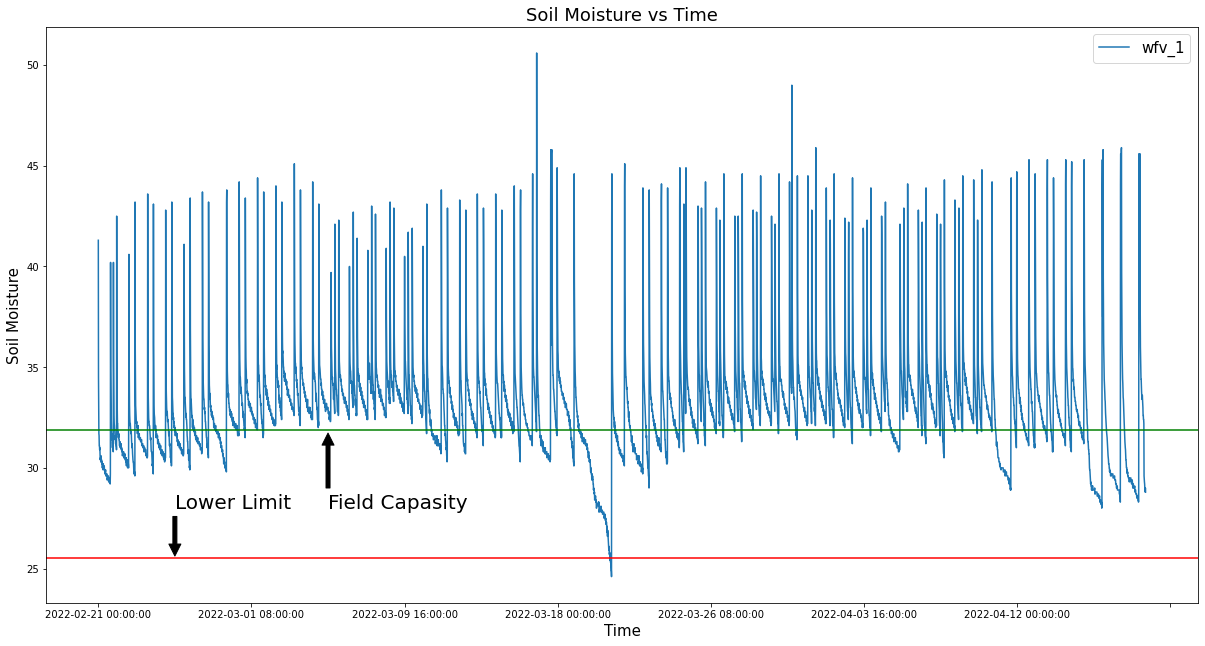

In [10]:
x = A1Top['DateTime']
y_1 = A1Top['SM_Top_A1']
x_a = A1Top.loc[A1Top.index[1200], 'DateTime']
x_b = A1Top.loc[A1Top.index[400], 'DateTime']

fig = plt.figure(figsize=(16,8))
axes_4 = fig.add_axes([0,0,1,1]) #this means you want the whole array
axes_4.set_xlabel('Time' ,fontsize=15,) #rotation='vertical')
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time',fontsize=18)
axes_4.plot(x, y_1, label='wfv_1')

axes_4.legend(loc='best',fontsize=15)

plt.axhline(y = fc, color = 'g', label = 'Field Capasity')
plt.axhline(y = low_lim, color = 'r', label = 'Lower Limit')

axes_4.annotate('Field Capasity', xy=(x_a ,fc),fontsize=20, xytext=(x_a, 28),
                arrowprops=dict(facecolor='black', shrink=0.05))

axes_4.annotate('Lower Limit', xy=(x_b ,low_lim),fontsize=20, xytext=(x_b, 28),
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))

plt.show()

In [11]:
Zoom_in = A1Top[60:85]
y_2=A1Top.loc[A1Top.index[78], 'DateTime']
y_2


'2022-02-21 19:30:00'

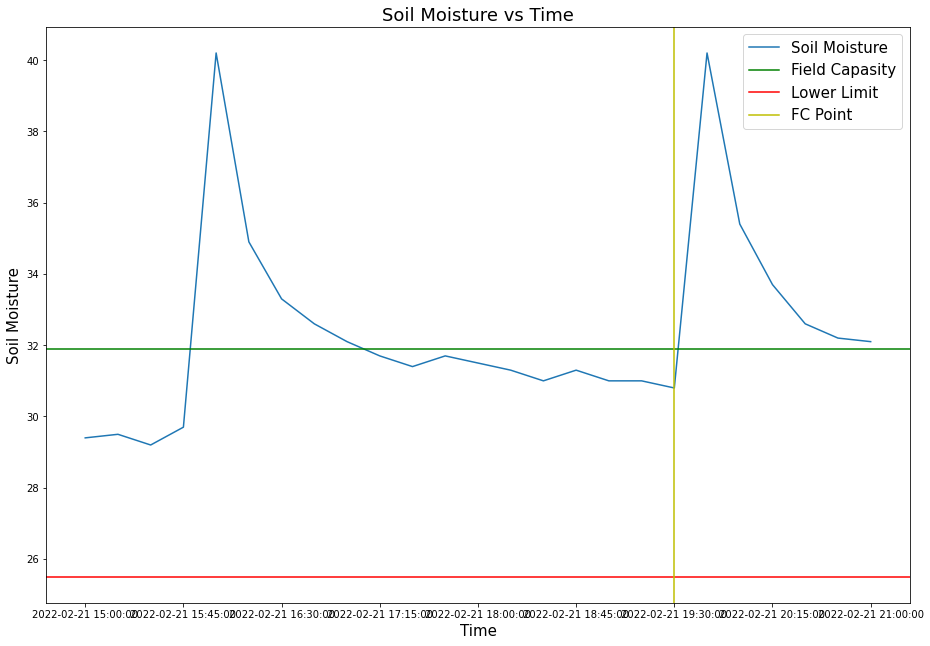

In [12]:
x = Zoom_in['DateTime']
y_1 = Zoom_in['SM_Top_A1']


fig = plt.figure(figsize=(12,8))
axes_4 = fig.add_axes([0,0,1,1]) 
axes_4.set_xlabel('Time' ,fontsize=15,)
axes_4.set_ylabel('Soil Moisture',fontsize=15)
axes_4.set_title('Soil Moisture vs Time',fontsize=18)
axes_4.plot(x, y_1, label='Soil Moisture')
plt.axhline(y = fc, color = 'g', label = 'Field Capasity')
plt.axhline(y = low_lim, color = 'r', label = 'Lower Limit')
plt.axvline(x = y_2, color = 'y', label = 'FC Point')


axes_4.legend(loc='best',fontsize=15)

plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))

plt.show()

In [13]:
#Crop Stress Times during dry-back 
A1Top.loc[(A1Top['SM_Top_A1'] < low_lim)] 

,DateTime,SM_Top_A1,rstd,rstd_max,SM_Shift,rstd_Shift
2673,2022-03-20 20:15:00,25.4,0.152753,False,25.9,0.115470
2675,2022-03-20 20:45:00,25.5,0.200000,False,25.9,0.200000
2676,2022-03-20 21:00:00,25.3,0.115470,False,25.7,0.100000
2677,2022-03-20 21:15:00,25.3,0.115470,False,25.8,0.100000
2678,2022-03-20 21:30:00,25.1,0.200000,False,25.6,0.200000
2679,2022-03-20 21:45:00,24.9,0.115470,False,25.4,0.152753
2680,2022-03-20 22:00:00,24.9,0.173205,False,25.7,0.152753
2681,2022-03-20 22:15:00,24.6,10.133607,False,25.5,0.200000


**Conclusion**<br />
Basically, the soil moisture stayed within the AWC most of the time for the cannabis plants. An irrigation failure was corrected on one of the cannabis plants when it went below its lower limit.    The dry-back was a controlled condition where the moisture was intentionally  dropped below the lower limit. The determination of the lower limit helps determine when the dry-back  procedure begins to stress the crop and the duration of the stress which in turn affects the THC and CBD concentration.  


**References**

Šimůnek, J., M. Th. Van Genuchten, M. Sejna. 2008. "Development and Applications of the HYDRUS and STANMOD Software Packages and Related Codes." Vadose Zone J 587-600.

Assouline, S., and D. Or. 2014. "The concept of field capacity revisited: Defining intrinsic static and dynamic criteria for soil internal drainage dynamics." Water Resour. Res., 50, 4787– 4802, doi:10.1002/2014WR015475. . 

Bean, E. Z., R. G. Huffaker, and K. W. Migliaccio. 2018. "Estimating Field Capacity from Volumetric Soil Water Content Time Series Using Automated Processing Algorithms." Vadose Zone J. 17:180073. doi:10.2136/vzj2018.04.0073. 

Chandler, D. J., M. S. Seyfried, J. P. McNamara. and K. Hwang1. 2017. "Inference of Soil Hydrologic Parameters from Electronic Soil Moisture Records." Front. Earth Sci., Sec. Hydrosphere https://doi.org/10.3389/feart.2017.00025.

FAO-56. (1988). Crop and Evapotranspiration-Guidelines for Computing Crop Water Retirements Irrigation and Drainage. Food and Agriculture Organization of the United Nations.

Navin K. C. Twarakavi, Masaru Sakai, and Jirka Sˇimu ̊nek. 2009. "An objective analysis of the dynamic nature of field capacity." WATER RESOURCES RESEARCH, VOL. 45, W10410 doi:10.1029/2009WR007944.

Seyfried, M.S., L.E. Grant, E. Du, and K. Humes, and Seyfried. 2005. "Dielectric loss and calibration of the Hydra Probe soil water sensor." Vadose Zone J. 4: 1070-1079.

van Genuchten, M.T. 1980. "A closed-form equation for predicting the hydraulic conductivity of unsaturated soils." Soil Sci. Soc. Am. 44: 892-898.

Warrick, A. W. 2003. Soil Water Dynamics. Oxford University Press.

Zotarelli, L., M. D. Dukes, and K. T. Morgan. 2019. "Interpretation of Soil Moisture Content to Determine Soil Field Capacity and Avoid Over-Irrigating Sandy Soils Using Soil Moisture Sensors." University of Florida, Institute of Food and Agricultural Sciences (IFAS) AE460.



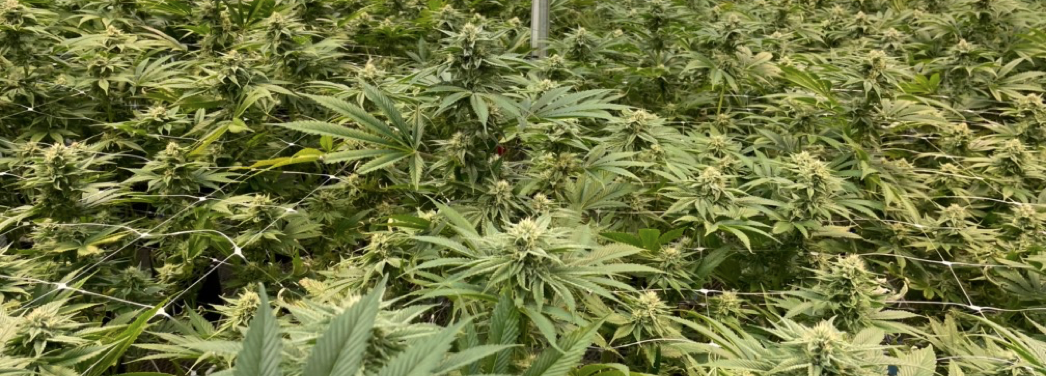